In [1]:
import pandas as pd
import numpy as np

In [2]:
emp = pd.read_csv('c:\my_python\data\emp.csv')
dept = pd.read_csv('c:\my_python\data\dept.csv')

## 1. select job, max(sal) from emp group by job
- result_index()키워드는 Series(=칼럼)를 출력하는게 아니라 
- DataFrame(테이블)로 출력하는 키워드 

In [3]:
result = emp.groupby('job')['sal'].max().reset_index()
print(result)

         job   sal
0    ANALYST  3000
1      CLERK  1300
2    MANAGER  2975
3  PRESIDENT  5000
4   SALESMAN  1600


## 2. 
```bash 
select deptno, sum(sal)
from emp
where deptno != 20
group by deptno ;
```

In [6]:
result1 = emp.groupby('deptno')['sal'].sum().reset_index()
print(result1[['deptno','sal']][result1['deptno']!=20]) #항상 출력할 칼럼 먼저 쓰고 조건(행) 쓰기!!

   deptno   sal
0      10  8750
2      30  9400


## 3. 부서번호, 부서별 평균월급 구하기 
```bash
select deptno, avg(Sal)
from emp
group by deptno ;
```

In [8]:
result2 = emp.groupby('deptno')['sal'].mean().reset_index()
print(result2)
print(type(result2)) #<class 'pandas.core.frame.DataFrame'>

   deptno          sal
0      10  2916.666667
1      20  2175.000000
2      30  1566.666667
<class 'pandas.core.frame.DataFrame'>


## 4. 위에서 평균월급 출력할 때 정수 부분만 출력 
- astype() 사용 

In [9]:
result3 = emp.groupby('deptno')['sal'].mean().reset_index().astype('int')
print(result3)

   deptno   sal
0      10  2916
1      20  2175
2      30  1566


## 5. 부서위치별 월급의 합 
- 판다스의 merge() 사용 
```bash
select loc, sum(Sal)
from emp e, deptno d
where e.deptno = d.deptno 
group by  d.loc ;
```

```bash
select loc, sum(sal)
from emp join dept using(deptno)
group by loc 
```
- join 할 때 on : 붙이려는 칼럼명이 다를 때 각 테이블의 이름 명시해주고 붙여주기 

In [10]:
result4 = pd.merge(emp, dept, on = 'deptno')
print(type(result4)) #<class 'pandas.core.frame.DataFrame'>
result4_1 = result4.groupby('loc')['sal'].sum().reset_index()
print(result4_1) 

<class 'pandas.core.frame.DataFrame'>
        loc    sal
0   CHICAGO   9400
1    DALLAS  10875
2  NEW YORK   8750


## 6.
```bash
select loc, sum(sal)
from emp outer right join dept using deptno
group by loc 
```

DataFrame.merge(right, how = 'inner', on = None, left_on = None, right_on = None, left_index = False,
               right_index = False, sort = False, suffixes = ('_x', '_y'), copy = True, indicator = False, 
                validate = None)
pandas.merge( emp_left, dept_right, how='inner', on='deptno')

- how ='inner' : emp 와 dept 데이터 프레임에 공통적으로 존재하는 교집합일 경우에만 추출하겠다.
        
- how ='outer' : 열의 데이터가 양쪽 데이터 프레임에 공통적으로 존재하는 교집합이 아니어도 추출하겠다.
                           
- how ='left'  :   왼쪽 데이터 프레임의 키열에 속하는 데이터값을 기준으로 병합하겠다.
        
- how = 'right' :  오른쪽 데이터 프레임의 키열에 속하는 데이터 값을 기준으로 병합하겠다.

In [12]:
result5 = pd.merge(emp, dept, how='outer', on = 'deptno')
result5_1 = result5.groupby('loc')['sal'].sum().reset_index()
print(result5_1)

        loc      sal
0    BOSTON      0.0
1   CHICAGO   9400.0
2    DALLAS  10875.0
3  NEW YORK   8750.0


## 7. csv 모듈 이용해서 emp.csv 불러오기

In [2]:
import csv
file = open('c:\my_python\data\emp03.csv') #파일 불러와서 객체에 담기
emp_res = csv.reader(file) # 파일 읽기
for m_list in emp_res :
    print(m_list) 

['7369', 'SMITH', 'CLERK', '7902', '1980-12-17', '800', 'NULL', '20']
['7499', 'ALLEN', 'SALESMAN', '7698', '1981-02-20', '1600', '300', '30']
['7521', 'WARD', 'SALESMAN', '7698', '1981-02-22', '1250', '500', '30']
['7566', 'JONES', 'MANAGER', '7839', '1981-04-02', '2975', 'NULL', '20']
['7654', 'MARTIN', 'SALESMAN', '7698', '1981-09-28', '1250', '1400', '30']
['7698', 'BLAKE', 'MANAGER', '7839', '1981-05-01', '2850', 'NULL', '30']
['7782', 'CLARK', 'MANAGER', '7839', '1981-06-09', '2450', 'NULL', '10']
['7788', 'SCOTT', 'ANALYST', '7566', '1987-04-19', '3000', 'NULL', '20']
['7839', 'KING', 'PRESIDENT', 'NULL', '1981-11-17', '5000', 'NULL', '10']
['7844', 'TURNER', 'SALESMAN', '7698', '1981-09-08', '1500', '0', '30']
['7876', 'ADAMS', 'CLERK', '7788', '1987-05-23', '1100', 'NULL', '20']
['7900', 'JAMES', 'CLERK', '7698', '1981-12-03', '950', 'NULL', '30']
['7902', 'FORD', 'ANALYST', '7566', '1981-12-03', '3000', 'NULL', '20']
['7934', 'MILLER', 'CLERK', '7782', '1982-01-23', '1300', '

## 8. emp_res 객체 통해서 이름, 봉급 구하기 
- 단, 봉급 = 월급 * 11.2

In [17]:
import csv
file = open('c:\my_python\data\emp03.csv') 
emp_res = csv.reader(file)
for m_list in emp_res :
    r = float(m_list[5])*11.2
    print(m_list[1], round(r))


SMITH 8960
ALLEN 17920
WARD 14000
JONES 33320
MARTIN 14000
BLAKE 31920
CLARK 27440
SCOTT 33600
KING 56000
TURNER 16800
ADAMS 12320
JAMES 10640
FORD 33600
MILLER 14560


## 9. emp_res에서 직업이 'salesman'인 사원의 이름, 직업 출력 

In [19]:
file = open('c:\my_python\data\emp03.csv') 
emp_res = csv.reader(file)
for m_list in emp_res :
    if m_list[2] == 'SALESMAN' :
        print(m_list[1], m_list[2])

ALLEN SALESMAN
WARD SALESMAN
MARTIN SALESMAN
TURNER SALESMAN


In [21]:
for m_list in emp_res :
    print(m_list)
m_list

['7934', 'MILLER', 'CLERK', '7782', '1982-01-23', '1300', 'NULL', '10']

## 10. emp.csv 결측치 확인 하기 
- 결측치 = NaN = not a number

In [24]:
import pandas as pd
emp = pd.read_csv('c:\my_python\data\emp.csv')
emp.isnull().sum()

empno        0
ename        0
job          0
mgr          1
hiredate     0
sal          0
comm        10
deptno       0
dtype: int64

In [25]:
# comm이 null인 사원이름 출력하기 
emp[['ename','comm']][emp['comm'].isnull()]

,ename,comm
0,SMITH,NaN
3,JONES,NaN
5,BLAKE,NaN
6,CLARK,NaN
7,SCOTT,NaN
8,KING,NaN
10,ADAMS,NaN
11,JAMES,NaN
12,FORD,NaN
13,MILLER,NaN


In [26]:
# 커미션이 결측치가 아닌 사원의 이름 출력 
emp[['ename','comm']][~emp['comm'].isnull()]

,ename,comm
1,ALLEN,300.0
2,WARD,500.0
4,MARTIN,1400.0
9,TURNER,0.0


## 11. 파생데이터 생성  (= 파생변수 생성)

In [27]:
# emp에 있는 sal을 sal02라는 칼럼을 생성해서 추가하기 
emp01 = emp
emp01['sal02'] = emp['sal']
emp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   empno     14 non-null     int64  
 1   ename     14 non-null     object 
 2   job       14 non-null     object 
 3   mgr       13 non-null     float64
 4   hiredate  14 non-null     object 
 5   sal       14 non-null     int64  
 6   comm      4 non-null      float64
 7   deptno    14 non-null     int64  
 8   sal02     14 non-null     int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 1.1+ KB


## 12. 이름, 부서위치 출력 

In [29]:
dept = pd.read_csv('c:\my_python\data\dept.csv')
merge_1 = pd.merge(emp, dept, how='inner', on = 'deptno')
merge_1[['ename','loc']]

,ename,loc
0,SMITH,DALLAS
1,JONES,DALLAS
2,SCOTT,DALLAS
3,ADAMS,DALLAS
4,FORD,DALLAS
5,ALLEN,CHICAGO
6,WARD,CHICAGO
7,MARTIN,CHICAGO
8,BLAKE,CHICAGO
9,TURNER,CHICAGO


## 13. 그래프 그리기 

In [31]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline # plt 객체를 통해 그래프를 show() 랜더링, 대신 사용 

UsageError: unrecognized arguments: # plt 객체를 통해 그래프를 show() 랜더링, 대신 사용


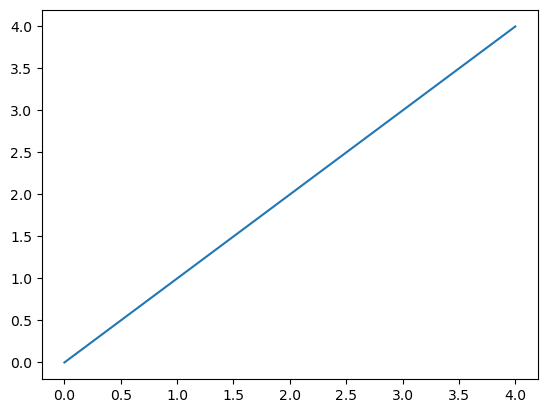

In [32]:
d = [0,1,2,3,4]
plt.plot(d) # x, y축 값의 인수를 내부 지정

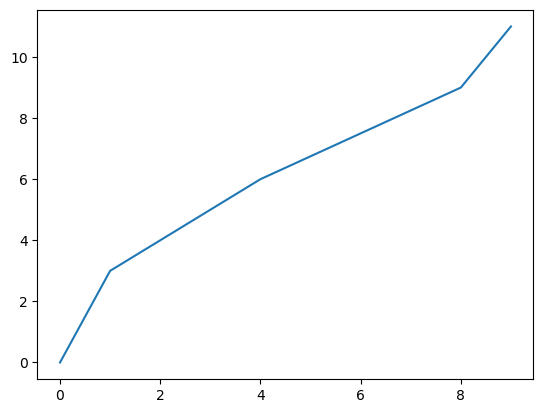

In [33]:
# 점과 점을 선으로 연결 : plt.plot(x[i], y[i])
x = [0,1,4,8,9]
y = [0,3,6,9,11]
plt.plot(x, y)

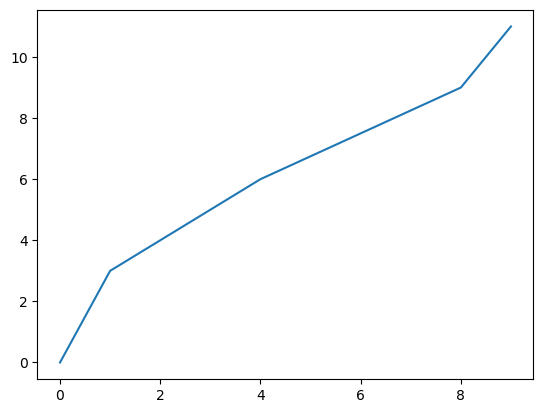

In [34]:
# numpy로 연동해보기 
x = [0,1,4,8,9]
y = [0,3,6,9,11]
array_x = np.array(x)
array_y = np.array(y)
plt.plot(array_x, array_y)

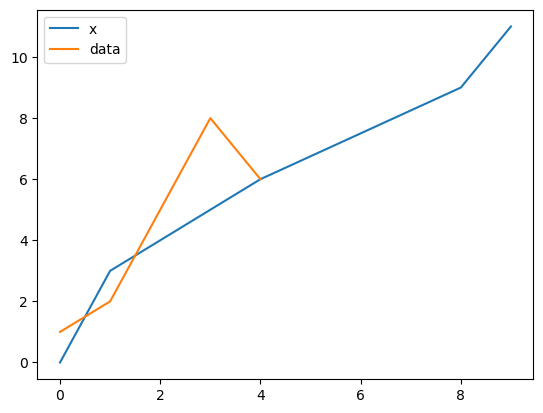

In [39]:
# 여러개의 선으로 표시 
x = [0,1,4,8,9]
y = [0,3,6,9,11]
data = [1,2,5,8,6]
plt.plot(x,y, label = 'x')
plt.plot(data, label = 'data')
plt.legend()

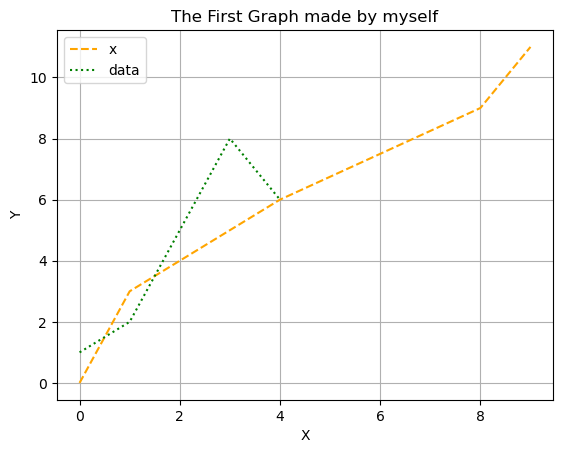

In [42]:
# 여러개의 선으로 표시, 속성을 확인 linestyle, color, marker 
x = [0,1,4,8,9]
y = [0,3,6,9,11]
data = [1,2,5,8,6]
plt.plot(x, y, linestyle = '--', color = 'orange', label = 'x')
plt.plot(data, linestyle = ':', color = 'green', label = 'data')
plt.legend()

plt.title('The First Graph made by myself')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)

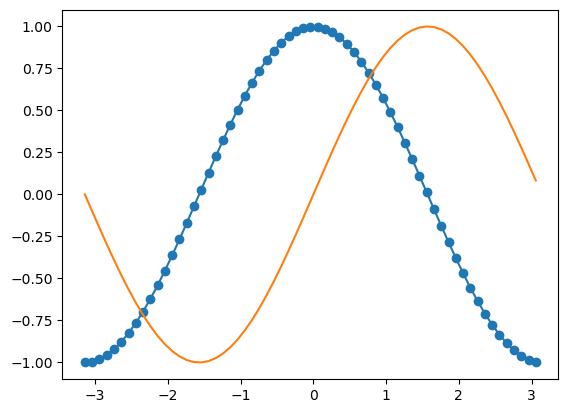

In [43]:
# 곡선 
x = np.arange(-np.pi, np.pi, 0.1) # np.pi : 넘파이로 원주율(파이값) 구하기 
plt.plot(x, np.cos(x), marker = 'o') #코사인
plt.plot(x, np.sin(x)) #사인 